<a href="https://colab.research.google.com/github/YanjunLin-Andrie/FanaticFi/blob/main/FanaticFi_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from sklearn import svm
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [13]:
# Upload cc_default.csv to Colab
from google.colab import files

csv_file = files.upload()

# Load data
df = pd.read_csv(Path('2017-2021_Historical_Players_Data.csv'))
df.head()

Saving 2017-2021_Historical_Players_Data.csv to 2017-2021_Historical_Players_Data (4).csv


,Unnamed: 0,DraftYr,Rk,Pk,Tm,Pos,Player,College,Contract Worth,Yrs,...,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1,1990,1,1,BRK,NaN,Derrick Coleman,Syracuse,NaN,15.0,...,64.3,0.119,1.4,22.3,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,1990,2,2,OKC,NaN,Gary Payton,Oregon State,NaN,17.0,...,145.5,0.148,3.3,62.5,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,1990,3,3,DEN,NaN,Mahmoud Abdul-Rauf,LSU,NaN,9.0,...,25.2,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990
3,4,1990,4,4,ORL,NaN,Dennis Scott,Georgia Tech,NaN,10.0,...,33.4,0.089,0.2,9.9,28.6,12.9,2.8,2.1,https://www.sports-reference.com/cbb/players/d...,1990
4,5,1990,5,5,CHA,NaN,Kendall Gill,Illinois,NaN,15.0,...,47.8,0.078,0.1,15.8,30.5,13.4,4.1,3.0,https://www.sports-reference.com/cbb/players/k...,1990


In [14]:
# Drop irrelevant columns

df = df.drop(columns = ['DraftYr','Pk','Tm','Player','College','Contract Worth','Yrs','playerurl','DraftYear','Unnamed: 0','Pos']).fillna(0)
df

,Rk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG
0,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,64.3,0.119,1.4,22.3,33.2,16.5,9.3,2.5
1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,0.729,145.5,0.148,3.3,62.5,35.3,16.3,3.9,6.7
2,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,0.905,25.2,0.077,-0.8,4.5,26.7,14.6,1.9,3.5
3,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,33.4,0.089,0.2,9.9,28.6,12.9,2.8,2.1
4,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,0.754,47.8,0.078,0.1,15.8,30.5,13.4,4.1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,56,2.0,7.0,1.0,0.0,1.0,0.000,0.000,0.500,0.0,0.164,6.1,0.0,3.5,0.5,0.0,0.5
1864,57,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1865,58,18.0,117.0,19.0,27.0,1.0,0.727,0.000,0.750,0.4,0.145,-0.6,0.0,6.5,1.1,1.5,0.1
1866,59,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb1a75a510>,
      dtype=object)

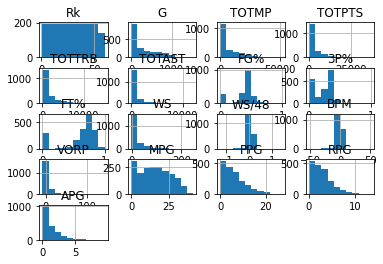

In [15]:
# Check data distribution of all aspects
df.hist()

In [16]:
# Create a column to hold Group data
df.loc[:,'Group'] = 0
df.head()

,Rk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Group
0,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,64.3,0.119,1.4,22.3,33.2,16.5,9.3,2.5,0
1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,0.729,145.5,0.148,3.3,62.5,35.3,16.3,3.9,6.7,0
2,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,0.905,25.2,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,0
3,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,33.4,0.089,0.2,9.9,28.6,12.9,2.8,2.1,0
4,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,0.754,47.8,0.078,0.1,15.8,30.5,13.4,4.1,3.0,0


---
## Find top 15
### Binary Classification

In [17]:
# Create groups based on ranks
for index, row in df.iterrows():
    if row['Rk'] <= 15:
        df.at[index,'Group'] = 0
    else:
        df.at[index,'Group'] = 1
    
df

,Rk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Group
0,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,64.3,0.119,1.4,22.3,33.2,16.5,9.3,2.5,0
1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,0.729,145.5,0.148,3.3,62.5,35.3,16.3,3.9,6.7,0
2,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,0.905,25.2,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,0
3,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,33.4,0.089,0.2,9.9,28.6,12.9,2.8,2.1,0
4,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,0.754,47.8,0.078,0.1,15.8,30.5,13.4,4.1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,56,2.0,7.0,1.0,0.0,1.0,0.000,0.000,0.500,0.0,0.164,6.1,0.0,3.5,0.5,0.0,0.5,1
1864,57,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1
1865,58,18.0,117.0,19.0,27.0,1.0,0.727,0.000,0.750,0.4,0.145,-0.6,0.0,6.5,1.1,1.5,0.1,1
1866,59,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [18]:
# Set Feature and Target
X = df.drop(columns=['Rk','Group'])
y = df['Group']

In [19]:
y.value_counts()

1    1388
0     480
Name: Group, dtype: int64

In [20]:
# Split dataset into train, test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [21]:
# Initiate the scaler
X_scaler = StandardScaler()

# Fit the scaler to the features dataset
X_scaler = X_scaler.fit(X)

In [22]:
# Scale train, test datasets
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---
## Use the SVC classifier model

In [23]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [24]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

           0       0.64      0.41      0.50       110
           1       0.84      0.93      0.88       357

    accuracy                           0.81       467
   macro avg       0.74      0.67      0.69       467
weighted avg       0.79      0.81      0.79       467



### Over sampling

In [25]:
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [26]:
# Resample features and target
random_oversampler = RandomOverSampler(random_state = 1)
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)


In [27]:
# Check resampled size
y_resampled.value_counts()

1    1031
0    1031
Name: Group, dtype: int64

In [28]:
# From SVM, instantiate SVC classifier model instance
svm_resampled_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_resampled_model = svm_resampled_model.fit(X_resampled, y_resampled)
 
# Use the testing data to make the model predictions
svm_resampled_pred = svm_resampled_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_resampled_testing_report = classification_report(y_test, svm_resampled_pred)

# Print the classification report
print(svm_resampled_testing_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.76      1.00      0.87       357

    accuracy                           0.76       467
   macro avg       0.38      0.50      0.43       467
weighted avg       0.58      0.76      0.66       467



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

---
## Use Ddceision Tree

In [29]:
# Import decision tree classifier from SKLearn
from sklearn import tree

# Initiate the model instance
dtc = tree.DecisionTreeClassifier()

# Fit the model using the training data
dtc_model = dtc.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
dtc_pred = dtc_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
dtc_testing_report = classification_report(y_test, dtc_pred)

# Print the classification report
print(dtc_testing_report)

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       110
           1       0.82      0.84      0.83       357

    accuracy                           0.74       467
   macro avg       0.63      0.63      0.63       467
weighted avg       0.73      0.74      0.74       467



---
## Use Logistic Regression

In [30]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
lr = LogisticRegression()

# Fit the model using the training data
lr_model = lr.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
lr_pred = lr_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(y_test, dtc_pred)

# Print the classification report
print(lr_testing_report)

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       110
           1       0.82      0.84      0.83       357

    accuracy                           0.74       467
   macro avg       0.63      0.63      0.63       467
weighted avg       0.73      0.74      0.74       467



---
## Use AdaBoost

In [31]:
# Import AdaBoost classifier from SKLearn
from sklearn.ensemble import AdaBoostClassifier

# Initiate the model instance
abc = AdaBoostClassifier()

# Fit the model using the training data
abc_model = abc.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
abc_pred = abc_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
abc_testing_report = classification_report(y_test, abc_pred)

# Print the classification report
print(abc_testing_report)

              precision    recall  f1-score   support

           0       0.60      0.45      0.51       110
           1       0.84      0.91      0.87       357

    accuracy                           0.80       467
   macro avg       0.72      0.68      0.69       467
weighted avg       0.78      0.80      0.79       467



---
## Use Deep Neural Network

### Use train test split method

In [39]:
# Define number of nodes on each layer
input_features = 16
layer1 = 40
layer2 = 30
layer3 = 10

# Initiate the model
nn = Sequential()

In [40]:
# Add all layers to the model
nn.add(Dense(
    units = layer1, 
    input_dim = input_features, 
    activation = 'relu'
))

nn.add(Dense(
    units = layer2, 
    activation = 'relu'
))

nn.add(Dense(
    units = layer3, 
    activation = 'relu'
))

# Add output layer
nn.add(Dense(units=1, activation = 'linear'))

In [41]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model
deep_net_model = nn.fit(X_train_scaled, y_train, epochs=100)

In [43]:
# Print loss and accuracy score of training set
loss, accuracy = nn.evaluate(X_train_scaled, y_train, verbose=2)

44/44 - 0s - loss: 0.0744 - accuracy: 0.9044 - 191ms/epoch - 4ms/step


In [44]:
# Print loss and accuracy score of testing set
val_loss, val_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

15/15 - 0s - loss: 0.1549 - accuracy: 0.8030 - 36ms/epoch - 2ms/step


In [77]:
deep_net_pred = nn.predict(X_test_scaled)
deep_net_pred[0:6]

array([[0.8284987 ],
       [0.4313444 ],
       [0.91319   ],
       [1.0866169 ],
       [0.08610158],
       [1.0177429 ]], dtype=float32)

In [82]:
deep_nex_pred = pd.DataFrame()
deep_net_pred

array([[ 0.8284987 ],
       [ 0.4313444 ],
       [ 0.91319   ],
       [ 1.0866169 ],
       [ 0.08610158],
       [ 1.0177429 ],
       [ 0.5150184 ],
       [ 0.7576484 ],
       [ 0.76145077],
       [ 0.9480484 ],
       [ 0.8886986 ],
       [ 0.9054393 ],
       [ 0.85791826],
       [ 0.43290374],
       [ 0.9480484 ],
       [ 0.83483624],
       [ 1.0070534 ],
       [ 0.9330211 ],
       [ 0.6606534 ],
       [ 0.8538501 ],
       [ 1.1404341 ],
       [ 0.9480484 ],
       [ 0.9657377 ],
       [ 1.3170751 ],
       [ 0.7266305 ],
       [ 0.37571546],
       [ 0.92200667],
       [ 0.05228785],
       [ 1.195038  ],
       [ 0.9234737 ],
       [-0.04580799],
       [ 0.9480482 ],
       [ 1.1005852 ],
       [ 1.0173862 ],
       [ 1.3169428 ],
       [ 0.9480484 ],
       [ 0.5959564 ],
       [ 0.50578165],
       [ 0.9331942 ],
       [ 0.70575905],
       [ 0.9480484 ],
       [ 0.8544222 ],
       [ 0.4579081 ],
       [ 0.99045545],
       [ 0.9480484 ],
       [ 1

In [58]:
from sklearn.metrics import classification_report

classification_report(y_test, outlst)

ValueError: ignored

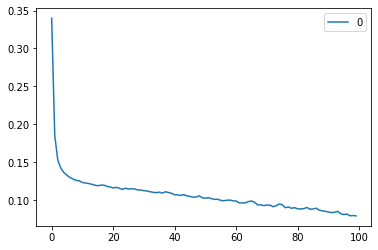

In [46]:
# Plot the loss rate
loss_df = pd.DataFrame(deep_net_model.history['loss'])
loss_df.plot()

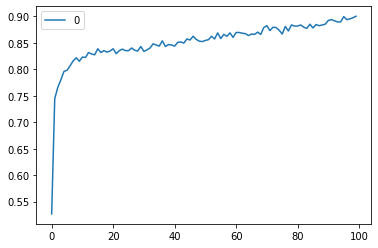

In [47]:
# Plot the accuracy score
accuracy_df = pd.DataFrame(deep_net_model.history['accuracy'])
accuracy_df.plot()

---
## Using validation split method


In [ ]:
# Initiate the scaler
X_scaler = StandardScaler()

# Fit the scaler to the features dataset
X_scaler = X_scaler.fit(X)
X_scaled = X_scaler.transform(X)

In [ ]:
# Initiate the model
nn = Sequential()
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
# Fit the model
history = nn.fit(X, y, validation_split=0.33, epochs=150, batch_size=30, verbose=0)
# list all data in history
print(history.history.keys())
[loss, accuracy] = nn.evaluate(X, y)
print("Train Data : Loss = {}, accuracy = {}".format(loss, accuracy))
[val_loss, val_accuracy] = nn.evaluate(X, y)
print("Test Data : Loss = {}, accuracy = {}".format(val_loss, val_accuracy))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---
## Using LazyPredict


In [ ]:
# Install LazyPRedict
!pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
# Re-split the train, test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

# Train the new datasets
lc = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
lc_predictions = lc.fit(X_train, X_test, y_train, y_test)

# Print the model
print(lc_predictions)